<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Exploratory Data Analysis on Terrorism Data Set</Center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
terror_df = pd.read_csv("terrorism.csv",encoding='ISO-8859-1',low_memory=False)
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terror_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
terror_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [5]:
terror_df = terror_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [6]:
terror_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [7]:
terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [8]:
print(f"Country with highest terror attacks :  {terror_df['Country'].value_counts().idxmax()}")
print(f"State with highest terror attacks : {terror_df['state'].value_counts().idxmax()}")
print(f"Region with highest terror attacks : {terror_df['Region'].value_counts().idxmax()}")
print(f"Year with highest terror attacks : {terror_df['Year'].value_counts().idxmax()}")
print(f"Gropu with highest terror attacks : {terror_df['Group'].value_counts().index[1]}")
print(f"Mode of attack : {terror_df['AttackType'].value_counts().idxmax()}")

Country with highest terror attacks :  Iraq
State with highest terror attacks : Baghdad
Region with highest terror attacks : Middle East & North Africa
Year with highest terror attacks : 2014
Gropu with highest terror attacks : Taliban
Mode of attack : Bombing/Explosion


In [9]:
terror_df['Year'].value_counts().sort_index().head(8)

1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
Name: Year, dtype: int64

# Data Visualization

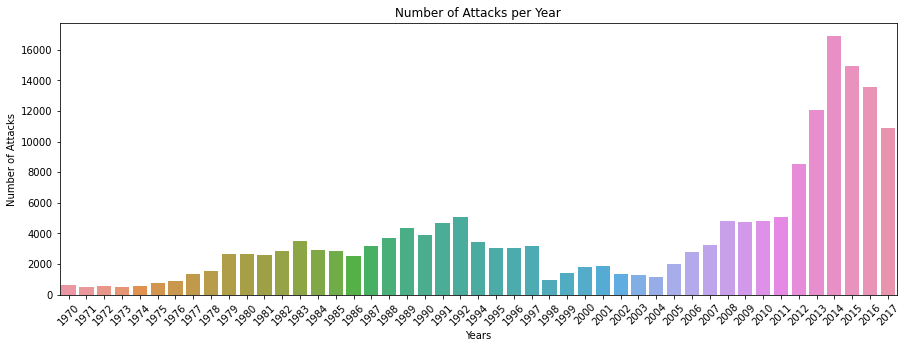

In [10]:
x_years = terror_df['Year'].unique()
y_values = terror_df['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 5))
sns.barplot(x = x_years , y = y_values)
plt.xticks(rotation = 45)
plt.xlabel("Years")
plt.ylabel("Number of Attacks")
plt.title("Number of Attacks per Year")
plt.show()

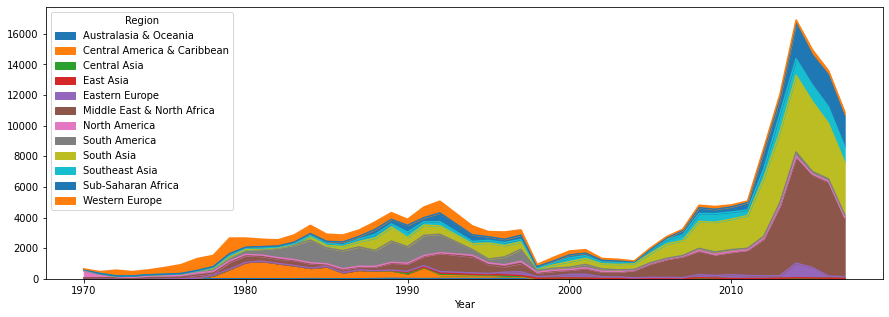

In [11]:
pd.crosstab(terror_df.Year , terror_df.Region).plot(kind= "area" , figsize = (15  , 5))
plt.show()

In [12]:
terror_df['Wounded'] = terror_df['Wounded'].fillna(0).astype(int)
terror_df['Killed'] = terror_df['Killed'].fillna(0).astype(int)
terror_df['Casualities'] = terror_df['Killed'] + terror_df['Wounded']
heat_df = terror_df.sort_values(by = "Casualities" , ascending = False)[:20]
heat_df = heat_df.pivot_table(index = "Country" , columns = "Year" , values ="Casualities").fillna(0)
heat_df.head()

Year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2006,2007,2008,2014,2016,2017
Country,,,,,,,,,,,,,,,
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1261.5,1503.0,0.0
Japan,0.0,0.0,0.0,0.0,5513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#C1F8CF'], [.3, '#4FD3C4'],  [.6, '#488FB1'],  [1, '#533E85']]
heatmap = go.Heatmap(z=heat_df.values, x=heat_df.columns, y=heat_df.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Terror Attacks in History from 1982 to 2016',
    xaxis = dict(nticks=20),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

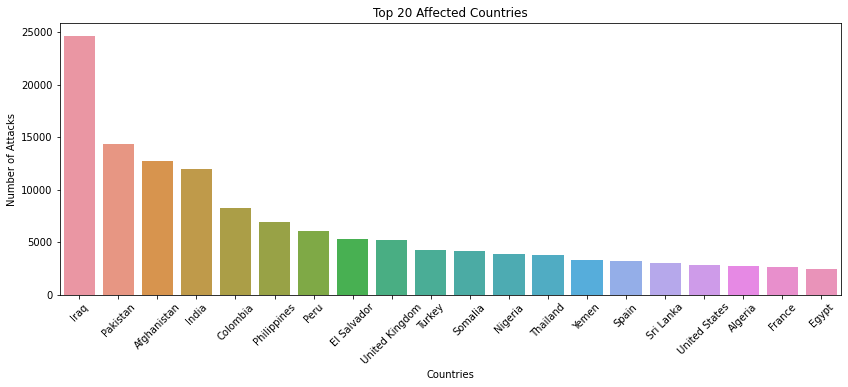

In [14]:
plt.figure(figsize = (14 , 5))
sns.barplot(x = terror_df['Country'].value_counts()[:20].index , y = terror_df['Country'].value_counts()[:20].values)
plt.xlabel("Countries")
plt.ylabel("Number of Attacks")
plt.title("Top 20 Affected Countries")
plt.xticks(rotation = 45)
plt.show()

## People Killed

In [15]:
print(f"Total number of people killed in terror attacks : {terror_df['Killed'].sum()}")

Total number of people killed in terror attacks : 411868


## Type Killed

In [16]:
typeKill = terror_df.groupby('AttackType').sum()[['Killed']]
typeKill

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


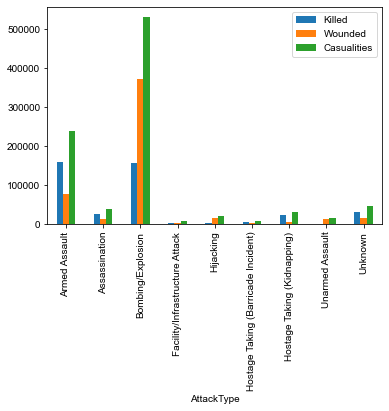

In [17]:
pd.DataFrame(terror_df.groupby('AttackType').sum()[['Killed' , 'Wounded' , 'Casualities']]).plot(kind= "bar")
sns.set_style("darkgrid")

Majourity of deaths are caused by Bombing / Explosion

<Center style="font-family: 'Helvetica Neue' ;font-size:35px; letter-spacing: 0.0625em ; color:white;background-image:url('black.jpg');padding:10px">Made By : Abhay Bisht</Center>